### Filtragem com Preservação de Bordas

#### Bibliotecas Utilizadas

In [122]:
# Bibliotecas Utilizadas
import cv2  # Para processamento de imagem
import numpy as np  # Para manipulação de arrays e cálculos matemáticos
import matplotlib.pyplot as plt  # Para exibir as imagens no notebook
from PIL import Image

#### Imagem Utilizada

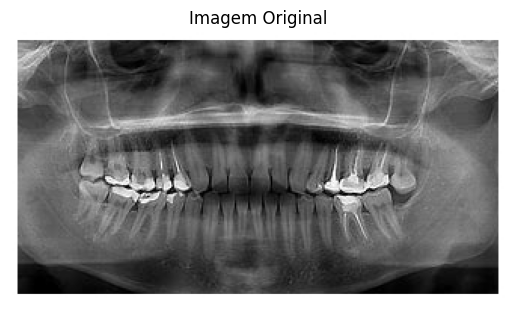

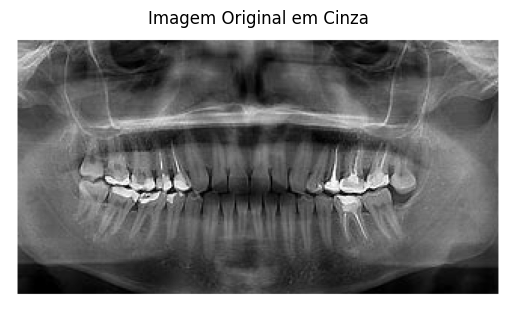

In [123]:
# Carregar e exibir a imagem utilizada
imagem_original = cv2.imread('radiografia.jpg')

# Exibir a imagem original
plt.imshow(imagem_original, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Carregar e exibir a imagem utilizada
imagem = cv2.imread('radiografia.jpg', cv2.IMREAD_GRAYSCALE)

# Exibir a imagem original
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original em Cinza')
plt.axis('off')
plt.show()

#### Ruído Impulsivo 

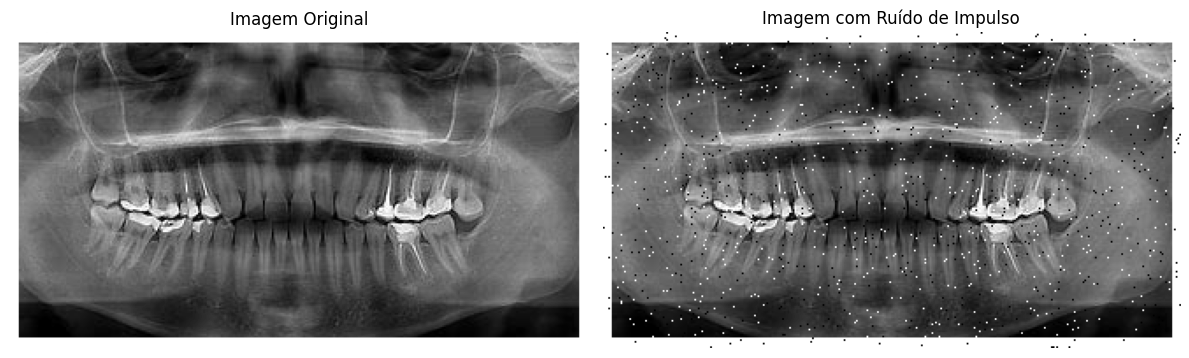

Dimensões da imagem com ruído: (180, 329)


In [138]:
# Função para adicionar ruído de impulso (sal e pimenta)
def ruído_impulso(imagem, Pa, Pb, a=0, b=255):
    # Copiar a imagem original para não modificar diretamente
    imagem_ruidosa = np.copy(imagem)
    
    # Tamanho da imagem
    altura, largura = imagem.shape
    
    # Número total de pixels
    num_pixels = altura * largura
    
    # Número de pixels com ruído preto e branco
    num_ruido_preto = int(Pa * num_pixels)
    num_ruido_branco = int(Pb * num_pixels)
    
    # Índices aleatórios para os pixels com ruído preto
    indices_preto = np.random.choice(num_pixels, num_ruido_preto, replace=False)
    
    # Índices aleatórios para os pixels com ruído branco
    indices_branco = np.random.choice(num_pixels, num_ruido_branco, replace=False)
    
    # Definir os pixels pretos
    imagem_ruidosa.ravel()[indices_preto] = a  # a = valor de intensidade do preto (0)
    
    # Definir os pixels brancos
    imagem_ruidosa.ravel()[indices_branco] = b  # b = valor de intensidade do branco (255)
    
    return imagem_ruidosa

# Carregar a imagem como array NumPy (usando Pillow para abrir)
imagem_array = np.array(imagem)

# Adicionar o ruído de impulso com probabilidades Pa e Pb
Pa = 0.01  # Probabilidade de ruído preto (sal)
Pb = 0.01  # Probabilidade de ruído branco (pimenta)
imagem_ruido = ruído_impulso(imagem_array, Pa, Pb)

# Converter o array resultante de volta para uma imagem
imagem_ruido_pil = Image.fromarray(imagem_ruido.astype(np.uint8))

# Exibir a imagem original e a imagem com ruído
plt.figure(figsize=(12, 6))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem_array, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Imagem com ruído de impulso
plt.subplot(1, 2, 2)
plt.imshow(imagem_ruido, cmap='gray')
plt.title('Imagem com Ruído de Impulso')
plt.axis('off')

plt.tight_layout()
plt.show()

# Verificar o shape do array da imagem com ruído
valores_pixels = imagem_ruido.shape
print(f"Dimensões da imagem com ruído: {valores_pixels}")
# Certifique-se de que você está passando a imagem como um array NumPy (não o shape)
imagem_ruido_array = np.array(imagem_ruido)  # Certifique-se de que imagem_ruido é um array NumPy



#### Filtragem com preservação de bordas

In [126]:
# Função para aplicar a filtragem com preservação de bordas
def filtragem_preservacao_bordas(imagem, tamanho_mascara):
    altura, largura = imagem.shape
    saida = np.zeros_like(imagem)

    # Iterar sobre cada pixel da imagem
    for i in range(tamanho_mascara // 2, altura - tamanho_mascara // 2):
        for j in range(tamanho_mascara // 2, largura - tamanho_mascara // 2):
            # Criar lista para armazenar variâncias e médias de diferentes máscaras
            variancias = []
            medias = []

            # Iterar sobre todas as máscaras ao redor do pixel (vizinhança)
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    # Definir os limites da máscara ao redor do pixel
                    x_inicio = i + dx
                    y_inicio = j + dy
                    x_fim = x_inicio + tamanho_mascara
                    y_fim = y_inicio + tamanho_mascara

                    # Extrair a máscara da imagem
                    mascara = imagem[x_inicio:x_fim, y_inicio:y_fim]

                    # Calcular a variância e a média da máscara
                    variancia = np.var(mascara)
                    media = np.mean(mascara)

                    # Armazenar os valores
                    variancias.append(variancia)
                    medias.append(media)

            # Encontrar o índice da máscara com a menor variância
            indice_melhor_mascara = np.argmin(variancias)

            # Atribuir ao pixel da imagem de saída a média da melhor máscara
            saida[i, j] = medias[indice_melhor_mascara]

    return saida

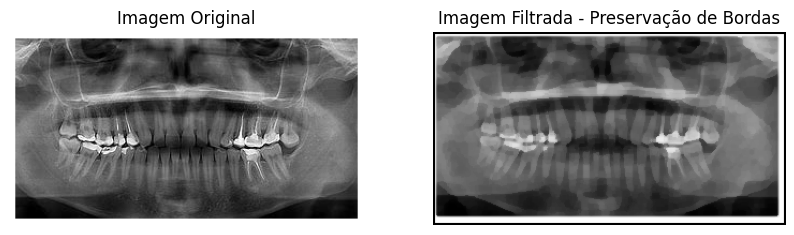

In [139]:
# Aplicar a filtragem
imagem_filtrada = filtragem_preservacao_bordas(imagem, tamanho_mascara=5)

# Exibir a imagem original e a filtrada
plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Imagem filtrada
plt.subplot(1, 2, 2)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada - Preservação de Bordas')
plt.axis('off')

plt.show()

#### Máscaras de Kawahara

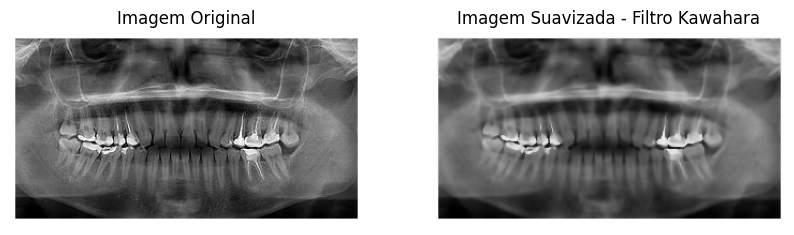

In [128]:
# Aplicar o filtro bilateral (suavização preservando bordas)
def filtro_kawahara(imagem, tamanho_kernel=5):
    # Filtro bilateral: tamanho_kernel controla o tamanho da vizinhança usada
    imagem_suavizada = cv2.bilateralFilter(imagem, tamanho_kernel, 75, 75)
    return imagem_suavizada

# Aplicar a máscara (filtro)
imagem_kawahara = filtro_kawahara(imagem)

# Exibir a imagem original e suavizada lado a lado
plt.figure(figsize=(10,5))

# Exibir imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir imagem com filtro de Kawahara (bilateral)
plt.subplot(1, 2, 2)
plt.imshow(imagem_kawahara, cmap='gray')
plt.title('Imagem Suavizada - Filtro Kawahara')
plt.axis('off')

plt.show()

#### Máscaras de Nagao e Matsuyama

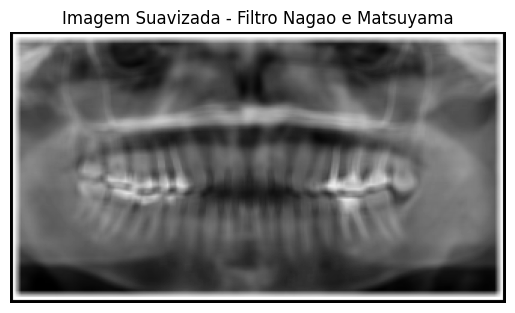

In [129]:
# Implementação do filtro de Nagao e Matsuyama
def filtro_nagao_matsuyama(imagem, tamanho_regiao=5):
    altura, largura = imagem.shape
    saida = np.zeros_like(imagem)
    deslocamentos = [(-2, -2), (-2, 0), (-2, 2), (0, -2), (0, 2), (2, -2), (2, 0), (2, 2)]
    
    for i in range(tamanho_regiao//2, altura-tamanho_regiao//2):
        for j in range(tamanho_regiao//2, largura-tamanho_regiao//2):
            regioes = []
            for dx, dy in deslocamentos:
                x_inicio, x_fim = i+dx, i+dx+tamanho_regiao
                y_inicio, y_fim = j+dy, j+dy+tamanho_regiao
                regiao = imagem[x_inicio:x_fim, y_inicio:y_fim]
                media_regiao = np.mean(regiao)
                regioes.append(media_regiao)
            
            desvios = [np.std(imagem[i-2:i+3, j-2:j+3]) for _ in regioes]
            indice_melhor_regiao = np.argmin(desvios)
            saida[i, j] = regioes[indice_melhor_regiao]
    
    return saida

# Aplicar o filtro
imagem_nagao = filtro_nagao_matsuyama(imagem)

# Exibir o resultado
plt.imshow(imagem_nagao, cmap='gray')
plt.title('Imagem Suavizada - Filtro Nagao e Matsuyama')
plt.axis('off')
plt.show()

#### Máscaras de Adelmann

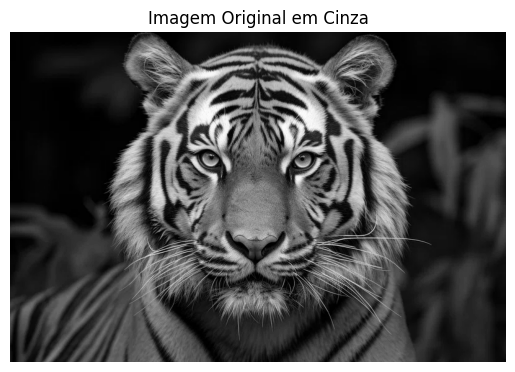

In [130]:
# Carregar e exibir a imagem utilizada
imagem_tiger = cv2.imread('tiger.png', cv2.IMREAD_GRAYSCALE)

# Exibir a imagem original
plt.imshow(imagem_tiger, cmap='gray')
plt.title('Imagem Original em Cinza')
plt.axis('off')
plt.show()

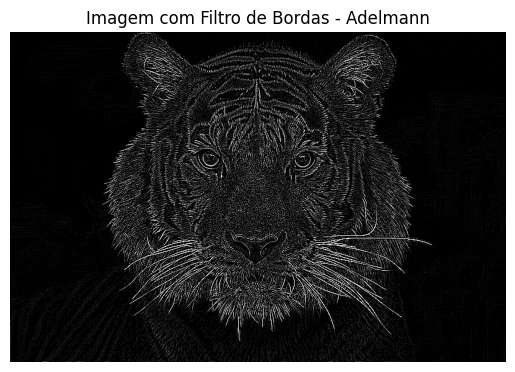

In [131]:
# Implementação do filtro de Adelmann (simples exemplo de filtro de bordas)
def filtro_adelmann(imagem):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    imagem_filtrada = cv2.filter2D(imagem, -1, kernel)
    return imagem_filtrada

# Aplicar o filtro
imagem_adelmann01 = filtro_adelmann(imagem_tiger)

# Exibir o resultado
plt.imshow(imagem_adelmann01, cmap='gray')
plt.title('Imagem com Filtro de Bordas - Adelmann')
plt.axis('off')
plt.show()


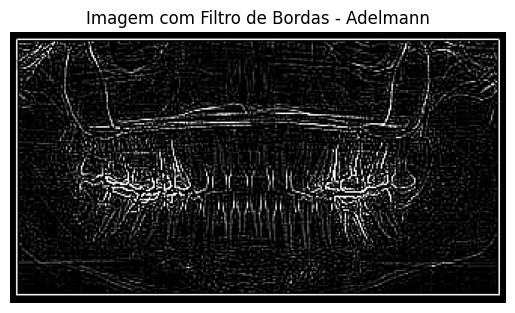

In [132]:
# Implementação do filtro de Adelmann (simples exemplo de filtro de bordas)
def filtro_adelmann(imagem):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    imagem_filtrada = cv2.filter2D(imagem, -1, kernel)
    return imagem_filtrada

# Aplicar o filtro
imagem_adelmann = filtro_adelmann(imagem)

# Exibir o resultado
plt.imshow(imagem_adelmann, cmap='gray')
plt.title('Imagem com Filtro de Bordas - Adelmann')
plt.axis('off')
plt.show()


#### Comparação dos Resultados

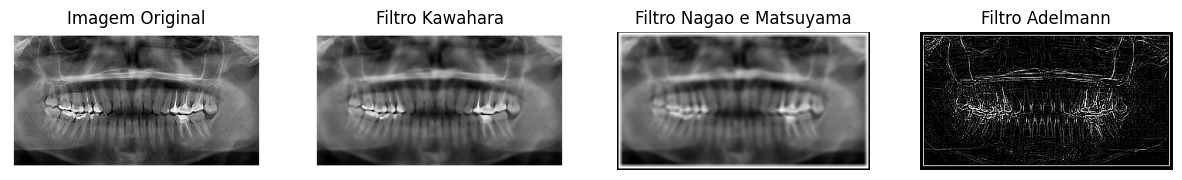

In [133]:
# Comparação das imagens
plt.figure(figsize=(15, 5))

# Imagem original
plt.subplot(1, 4, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Imagem com filtro de Kawahara
plt.subplot(1, 4, 2)
plt.imshow(imagem_kawahara, cmap='gray')
plt.title('Filtro Kawahara')
plt.axis('off')

# Imagem com filtro de Nagao e Matsuyama
plt.subplot(1, 4, 3)
plt.imshow(imagem_nagao, cmap='gray')
plt.title('Filtro Nagao e Matsuyama')
plt.axis('off')

# Imagem com filtro de Adelmann
plt.subplot(1, 4, 4)
plt.imshow(imagem_adelmann, cmap='gray')
plt.title('Filtro Adelmann')
plt.axis('off')

plt.show()


Filtro Gaussiano

In [134]:
# # Carregar a imagem em tons de cinza
# caminho_imagem = 'radiografia.jpg'  # Substitua pelo caminho correto
# imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)

# # Verificar se a imagem foi carregada corretamente
# if imagem is None:
#     print(f"Erro: não foi possível carregar a imagem no caminho: {caminho_imagem}")
# else:
#     # Aplicar o filtro Gaussiano
#     # O primeiro parâmetro é a imagem, (5, 5) é o tamanho do kernel, e 0 é o desvio padrão.
#     imagem_suavizada_gaussiana = cv2.GaussianBlur(imagem_ruido_array, (5, 5), 0)

#     # Exibir a imagem original e a imagem suavizada
#     plt.figure(figsize=(10, 5))

#     # Imagem original
#     plt.subplot(1, 2, 1)
#     plt.imshow(imagem, cmap='gray')
#     plt.title('Imagem Original')
#     plt.axis('off')

#     # Imagem suavizada com o filtro Gaussiano
#     plt.subplot(1, 2, 2)
#     plt.imshow(imagem_suavizada_gaussiana, cmap='gray')
#     plt.title('Imagem Suavizada - Filtro Gaussiano')
#     plt.axis('off')

#     plt.show()


In [ ]:
Ex